In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import distance

%matplotlib inline

In [3]:
df = pd.read_csv('/home/noe/Téléchargements/concordance_CEMA_20220329144201.csv', sep=",", encoding="UTF-8", header=None)

In [4]:
df

,0,1,2,3
0,0800_mgh-dd-kar-i_216516,Francorum et Langobardorum ac patricius Romano...,seruorum,dei concedimus uel confirmamus hoc nobis procu...
1,0800_passau_224441,mea aliquid deo conferre </s><s> Trado itaque ...,seruo,ancillas pratas rures campos siluas aquarum qu...
2,0800_pflugk-harttung_236150,autem hec in uilla puplica nuncupante Battaues...,seruus,seruorum Dei omnibus archiepiscopis et episcop...
3,0800_pflugk-harttung_236150,in uilla puplica nuncupante Battaues regnante ...,seruorum,Dei omnibus archiepiscopis et episcopis per to...
4,0800_pflugk-harttung_236150,apostolice auctoritatis priuilegio fretus omni...,seruorum,ancillarum uillarum redituum possederit uel De...
...,...,...,...,...
34230,9999_marmoutiermanceau_255656,in uinea illa erat dedimus ei et suo heredi ad...,seruus,uel colibertus nullus habebit </s><s> Fecimus ...
34231,9999_marmoutiervendomois_256306,nostri Maioris scilicet huius habitatores Mona...,serui,quondam et forestarii comitis Fulconis calumni...
34232,9999_marmoutiervendomois_256373,Rainaldus presbyter de Sancto Leobino Morandus...,seruus,Fulcherii Fulcradus Bastardus </s><s> Noticia ...
34233,9999_montcassin_233318,secundi pape archiepiscopis episcopis et abbat...,seruus,seruorum Dei omnibus episcopis et reliquis Chr...


In [6]:
df = df.drop(1, axis=1)
df = df.drop(3, axis=1)

In [7]:
df.columns= ["indice","lemme"]

In [8]:
df = df.set_index("indice")

In [9]:
df.sort_values("lemme", axis=0, ascending=True)

,lemme
indice,
0996_cugat_152620,Serue
0987_cugat_152506,Serue
1186_marmoutierserfs_256266,Serue
0897_plpape_238792,Serue
1000_besalu_200875,Serue
...,...
1176_morienval_143746,seruus
1176_montcassin_233252,seruus
1093_plpape_239829,seruus


In [10]:
plt.figure(figsize=(15,10), dpi=300)
df_final.plot.bar()
plt.xlabel("Termes")
plt.ylabel("Nombre d'occurrences")
plt.title("Occurrences du lemme seruus")
plt.savefig("Occurrences_seruus_corpus.png")

NameError: name 'df_final' is not defined

<Figure size 4500x3000 with 0 Axes>

In [5]:
liste_dates = ["300 - 349","350 - 399","400 – 450","450 - 499","500 - 549","550 – 599", "600 – 649","650 – 699", "700 – 749", "750 – 799","800 – 849",
              "850 – 899","900 – 949","950 – 999","1000 – 1049","1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249",
               "1250 – 1299","1300 – 1349","1350 – 1399","1400 – 1449","1450 – 1499",
               "1500 – 1549","1550 – 1559","1600 – 1649","1650 – 1699","1700 – 1749",
               "1750 – 1799"]
liste_valeurs = [0,0,0,5,118,82,90,143,108,490,713,
                1462,654,1163,1340,3105,7672,10258,4199,3669,
                1816,920,488,148,46,12,9,2,2,2]

In [6]:
df_occurrences = pd.DataFrame(list(zip(liste_dates,liste_valeurs)))

In [7]:
df_occurrences.columns = ["Dates","Occurrences"]
df_occurrences.set_index("Dates")

,Occurrences
Dates,
300 - 349,0
350 - 399,0
400 – 450,0
450 - 499,5
500 - 549,118
550 – 599,82
600 – 649,90
650 – 699,143
700 – 749,108


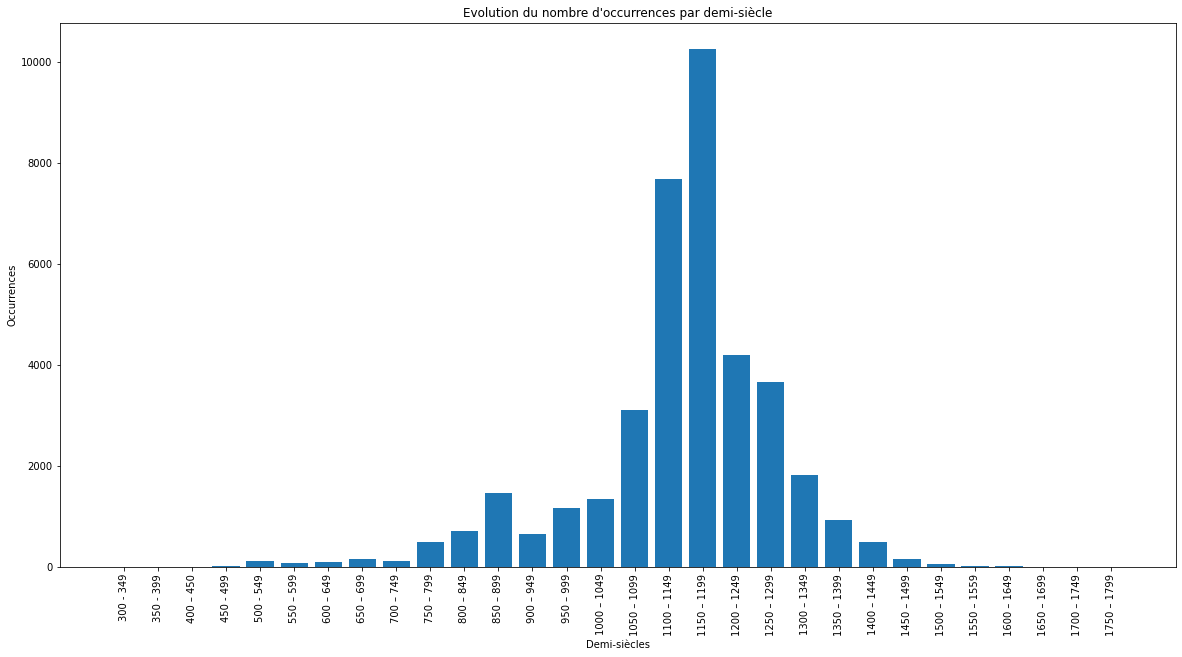

In [15]:
x = df_occurrences["Dates"]
y = df_occurrences["Occurrences"]
tickvalues = df_occurrences.index
plt.figure(figsize=(20,10))
plt.xticks(ticks = tickvalues, rotation ='vertical')
plt.xlabel("Demi-siècles")
plt.ylabel("Occurrences")
plt.title("Evolution du nombre d'occurrences par demi-siècle")
plt.bar(x,y)
plt.savefig("Evolution_occurrences_demi_siècle.png", dpi=300)

In [13]:
def csv_tograph(path):
    
    startindex = 0
    endindex = 0
    num = 0
    for i in path:
        num += 1
        if i == "/":
            startindex = num
        elif i == ".":
            endindex = num-1
    var = path[startindex:endindex]
    
    df = pd.read_csv(path,sep=",", header = 4, encoding = "UTF-8")
    df.columns = ["indice","1","lemme","2"]
    df = df.drop("1", axis=1)
    df = df.drop("2", axis=1)
    df = df.set_index("indice")
    df.sort_values("lemme", axis=0, ascending=True)
    df_final = pd.DataFrame(df['lemme'].str.lower().value_counts())
    
    
    plt.figure(figsize=(15,10), dpi=300)
    df_final.plot.bar()
    plt.xlabel("Termes")
    plt.ylabel("Nombre d'occurrences")
    plt.title(f"Occurrences du lemme {var}")
    plt.savefig(f"Occurrences_{var}.png")
    

In [1]:
def clean_csv(path):
    
    df = pd.read_csv(path,sep=",", header = 4, encoding = "UTF-8")
    df.columns = ["indice","1","lemme","2"]
    df = df.drop("1", axis=1)
    df = df.drop("2", axis=1)
    df = df.drop("indice", axis=1)
    
    df_final = pd.DataFrame(df['lemme'].str.lower().value_counts())
    
    return (df_final)

In [4]:
dfA = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Ancilla.csv')
dfC1 = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Colonus_1.csv')
dfC2 = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Colonus_2.csv')
dfF1 = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Famulus_1.csv')
dfF2 = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Famulus_2.csv')
dfM = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Mancipium.csv')
dfSerua = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Serua.csv')
dfSeruus = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Seruus.csv')
dfSC = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Sclauus.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Ancilla.csv'

In [16]:
dfSC2 = clean_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Sclauus.csv')
dfSC2

,lemme
sclauorum,276
sclaui,75
sclauo,45
sclauis,39
sclauos,36
sclauus,25
sclauum,4
sclaue,2


In [96]:
dfA.index = ['Dat/Abl pl','Acc pl','Nom/Abl sg','Gén pl','Acc sg','Gén sg']
dfC2.index = ['Gén sg','Nom sg','Acc pl','Dat/Abl sg','Acc sg','Gén pl']
dfF2.index = ['Nom sg','Gén sg','Dat/Abl sg','Acc pl','Gén pl','Acc sg','error']
dfF2 = dfF2.drop("error")
dfM.index = ['Dat/Abl pl','Nom/Acc pl','Gén pl','Nom/Acc sg','Dat/Abl sg','Gén sg']
dfSC.index = ['Gén pl','Gén sg','Dat/Abl sg','Dat/Abl pl','Acc pl','Nom sg','Acc sg','error']
dfSC = dfSC.drop('error')
dfSerua.index = ['Dat/Abl pl','Acc sg','Nom sg']
dfSeruus.index = ['Gén pl','Nom sg','Acc pl','Gén sg','Acc sg','Dat/Abl sg','Voc sg']

In [97]:
dfSC

,lemme
Gén pl,276
Gén sg,75
Dat/Abl sg,45
Dat/Abl pl,39
Acc pl,36
Nom sg,25
Acc sg,4


In [98]:
dfA = dfA/dfA.sum()
dfC2 = dfC2/dfC2.sum()
dfM = dfM/dfM.sum()
dfF2 = dfF2/dfF2.sum()
dfSC = dfSC/dfSC.sum()
dfSerua = dfSerua/dfSerua.sum()
dfSeruus = dfSeruus/dfSeruus.sum()



In [99]:
df_outer = dfA.merge(dfM, how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfC2,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSerua,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfSeruus,how='outer', left_index=True, right_index=True)
df_outer = df_outer.merge(dfF2,how='outer', left_index=True, right_index=True)

/tmp/ipykernel_3279/2512149515.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfSC,how='outer', left_index=True, right_index=True)
/tmp/ipykernel_3279/2512149515.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'lemme_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_outer = df_outer.merge(dfSeruus,how='outer', left_index=True, right_index=True)


In [100]:
df_outer.columns = ['Ancilla','Mancipium','Colonus','Sclauus','Serua','Seruus','Famulus']


<AxesSubplot:>

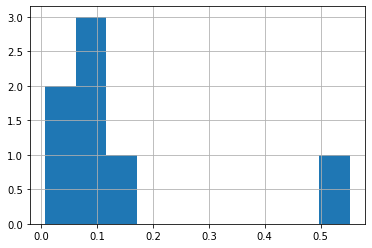

In [119]:
dfSC['lemme'].hist()

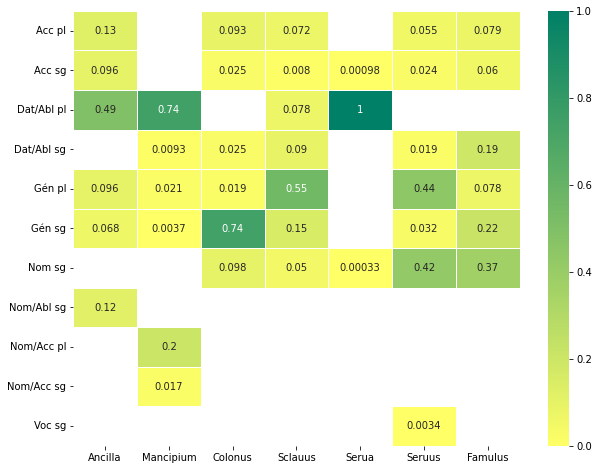

In [102]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_outer,vmin = 0, vmax = 1,annot=True,linewidths = .5,
               cmap='summer_r' )

results_path = 'results.png'
plt.savefig(results_path, dpi=400)


In [103]:
def open_csv(path):
    df = pd.read_csv(path,sep=",", header = 4, encoding = "UTF-8")
    df.columns = ["indice","1","lemme","2"]
    df = df.drop("1", axis=1)
    df = df.drop("2", axis=1)
    df = df.drop("indice", axis=1)
    
    return df

In [104]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/Cooccurrences_Seruus.csv', sep=",", header = 4, nrows = 100)
df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
df[['lemme','occurrence','apparitions_totales']]
df['pourcentage'] = df.apply(lambda row: row.occurrence/row.apparitions_totales, axis = 1)

In [105]:
df = df[["lemme","occurrence"]]
dictionnaire_seruus = pd.Series(df.occurrence.values,index=df.lemme).to_dict()

In [1]:
def csv_tosim(path1,path2):
    
    
    df = pd.read_csv(path1, sep=",", header = 4, nrows = 100)
    df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    #df[['lemme','occurrence','apparitions_totales']]
    
    df = df[["lemme","occurrence"]]
    dictionnaire1 = pd.Series(df.occurrence.values,index=df.lemme).to_dict()
    
    df2 = pd.read_csv(path2, sep=",", header = 1, nrows = 100)
    df2.columns = ['lemme','occurrence']
    #df2[['lemme','occurrence','apparitions_totales']]
    
    dictionnaire2 = pd.Series(df2.occurrence.values,index=df2.lemme).to_dict()
    
    indice_de_similarite = indice_similarite(dictionnaire1,dictionnaire2)
    
    return indice_de_similarite
    

In [7]:
neuvieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/')
neuvieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/850-899.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/850-899.csv')
dixieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/900-949.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/900-949.csv')
dixieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/950-999.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/950-999.csv')
onzieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1000-1049.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1000-1049.csv')
onzieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1050-1099.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1050-1099.csv')
douzieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1100-1149.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1100-1149.csv')
douzieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1150-1199.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1150-1199.csv')
treizieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1200-1249.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1200-1249.csv')
treizieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1250-1299.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1250-1299.csv')

IsADirectoryError: [Errno 21] Is a directory: '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/'

In [6]:
liste_indices = [neuvieme_siecle1,neuvieme_siecle2,dixieme_siecle1,dixieme_siecle2,onzieme_siecle1,onzieme_siecle2,douzieme_siecle1,
                douzieme_siecle2, treizieme_siecle1,treizieme_siecle2]
liste_dates_cooccurrences = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049",
                             "1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249","1250 – 1299"]

plt.figure(figsize=(15,10), dpi=300)
plt.bar(liste_dates_cooccurrences,liste_indices)
plt.savefig("Indices de similarité_mancipium_seruus.png")

NameError: name 'neuvieme_siecle1' is not defined

In [ ]:
from Fonctions import indice_similarite

In [128]:
liste = ["Noé","Vivien","Tristan","Leah"]
liste2 = ["Noé","Timothée","Vivien","Leah"]

In [110]:
def distance_jaccard(liste1,liste2):
    s1 = set(liste1)
    s2 = set(liste2)
    return len(s1.intersection(s2))/len(s1.union(s2))

In [149]:
distance_jaccard(liste,liste2)

0.28205128205128205

In [135]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv', sep=",", header = 4, nrows = 100)
df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
df = df[['lemme']]
liste = list(df['lemme'])


df2 = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/800-849.csv', sep=",", header = 4, nrows = 100)
df2.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
df2 = df2[["lemme"]]
liste2 = list(df2["lemme"])

print(liste)
print(liste2)



['--', 'cum1', 'qui2', 'res', 'domus', 'edificium', 'omnis', 'sum', 'terra', 'silua', 'pratum', 'in', 'hic3', 'uel', 'nomen', 'is2', 'sexus', 'uterque', 'ad', 'aqua', 'pascua', 'nam', 'idem2', 'uinea', 'de', 'suus', 'campus', 'pertineo', 'ibidem', 'ipse2', 'atque', 'ecclesia', 'habeo', 'quam', 'uilla', 'cultus1', 'decursus', 'tam', 'se', 'ut', 'monasterium', 'alius', 'aspicio', 'predictus', 'per', 'noster', 'unus', 'ceterus', 'quisquis1', 'mansus', 'uia', 'siue', 'dico2', 'commaneo', 'sanctus1', 'incultus1', 'memoro', 'uideo', 'locus', 'regressus', 'etas', 'uero1', 'quidam', 'meus', 'appendicia', 'integritas', 'ex', 'ue2', 'sicut', 'uidelicet', 'facio', 'desuper1', 'prefatus', 'ille2', 'nec', 'non', 'exitus', 'tempus', 'auctoritas', 'cum2', 'quattuor', 'charta', 'curtis', 'duo', 'uxor', 'ius', 'pars', 'commuto', '-', 'trado', 'homo', 'maneo', 'do', 'concedo', 'adiacentia', 'casa', '4', 'a', 'instrumentum', 'molendinum']
['et', '--', 'ipse2', 'qui2', 'tam', 'ingenuus1', 'petitio', 'quam

In [3]:
def csv_tojaccard(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 4, nrows = 100)
    df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df[['lemme']]
    liste1 = list(df["lemme"])
    
    df2 = pd.read_csv(path2, sep=",", header = 4, nrows = 100)
    df2.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df2[['lemme']]
    liste2 = list(df2["lemme"])
    
    jaccard = distance.jaccard(liste1,liste2)
    
    return 1 - jaccard

In [4]:
csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/800-849.csv')

NameError: name 'pd' is not defined

In [154]:
neuvieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/800-849.csv')
neuvieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/850-899.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/850-899.csv')
dixieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/900-949.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/900-949.csv')
dixieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/950-999.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/950-999.csv')
onzieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1000-1049.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1000-1049.csv')
onzieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1050-1099.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1050-1099.csv')
douzieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1100-1149.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1100-1149.csv')
douzieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1150-1199.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1150-1199.csv')
treizieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1200-1249.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1200-1249.csv')
treizieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1250-1299.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/1250-1299.csv')

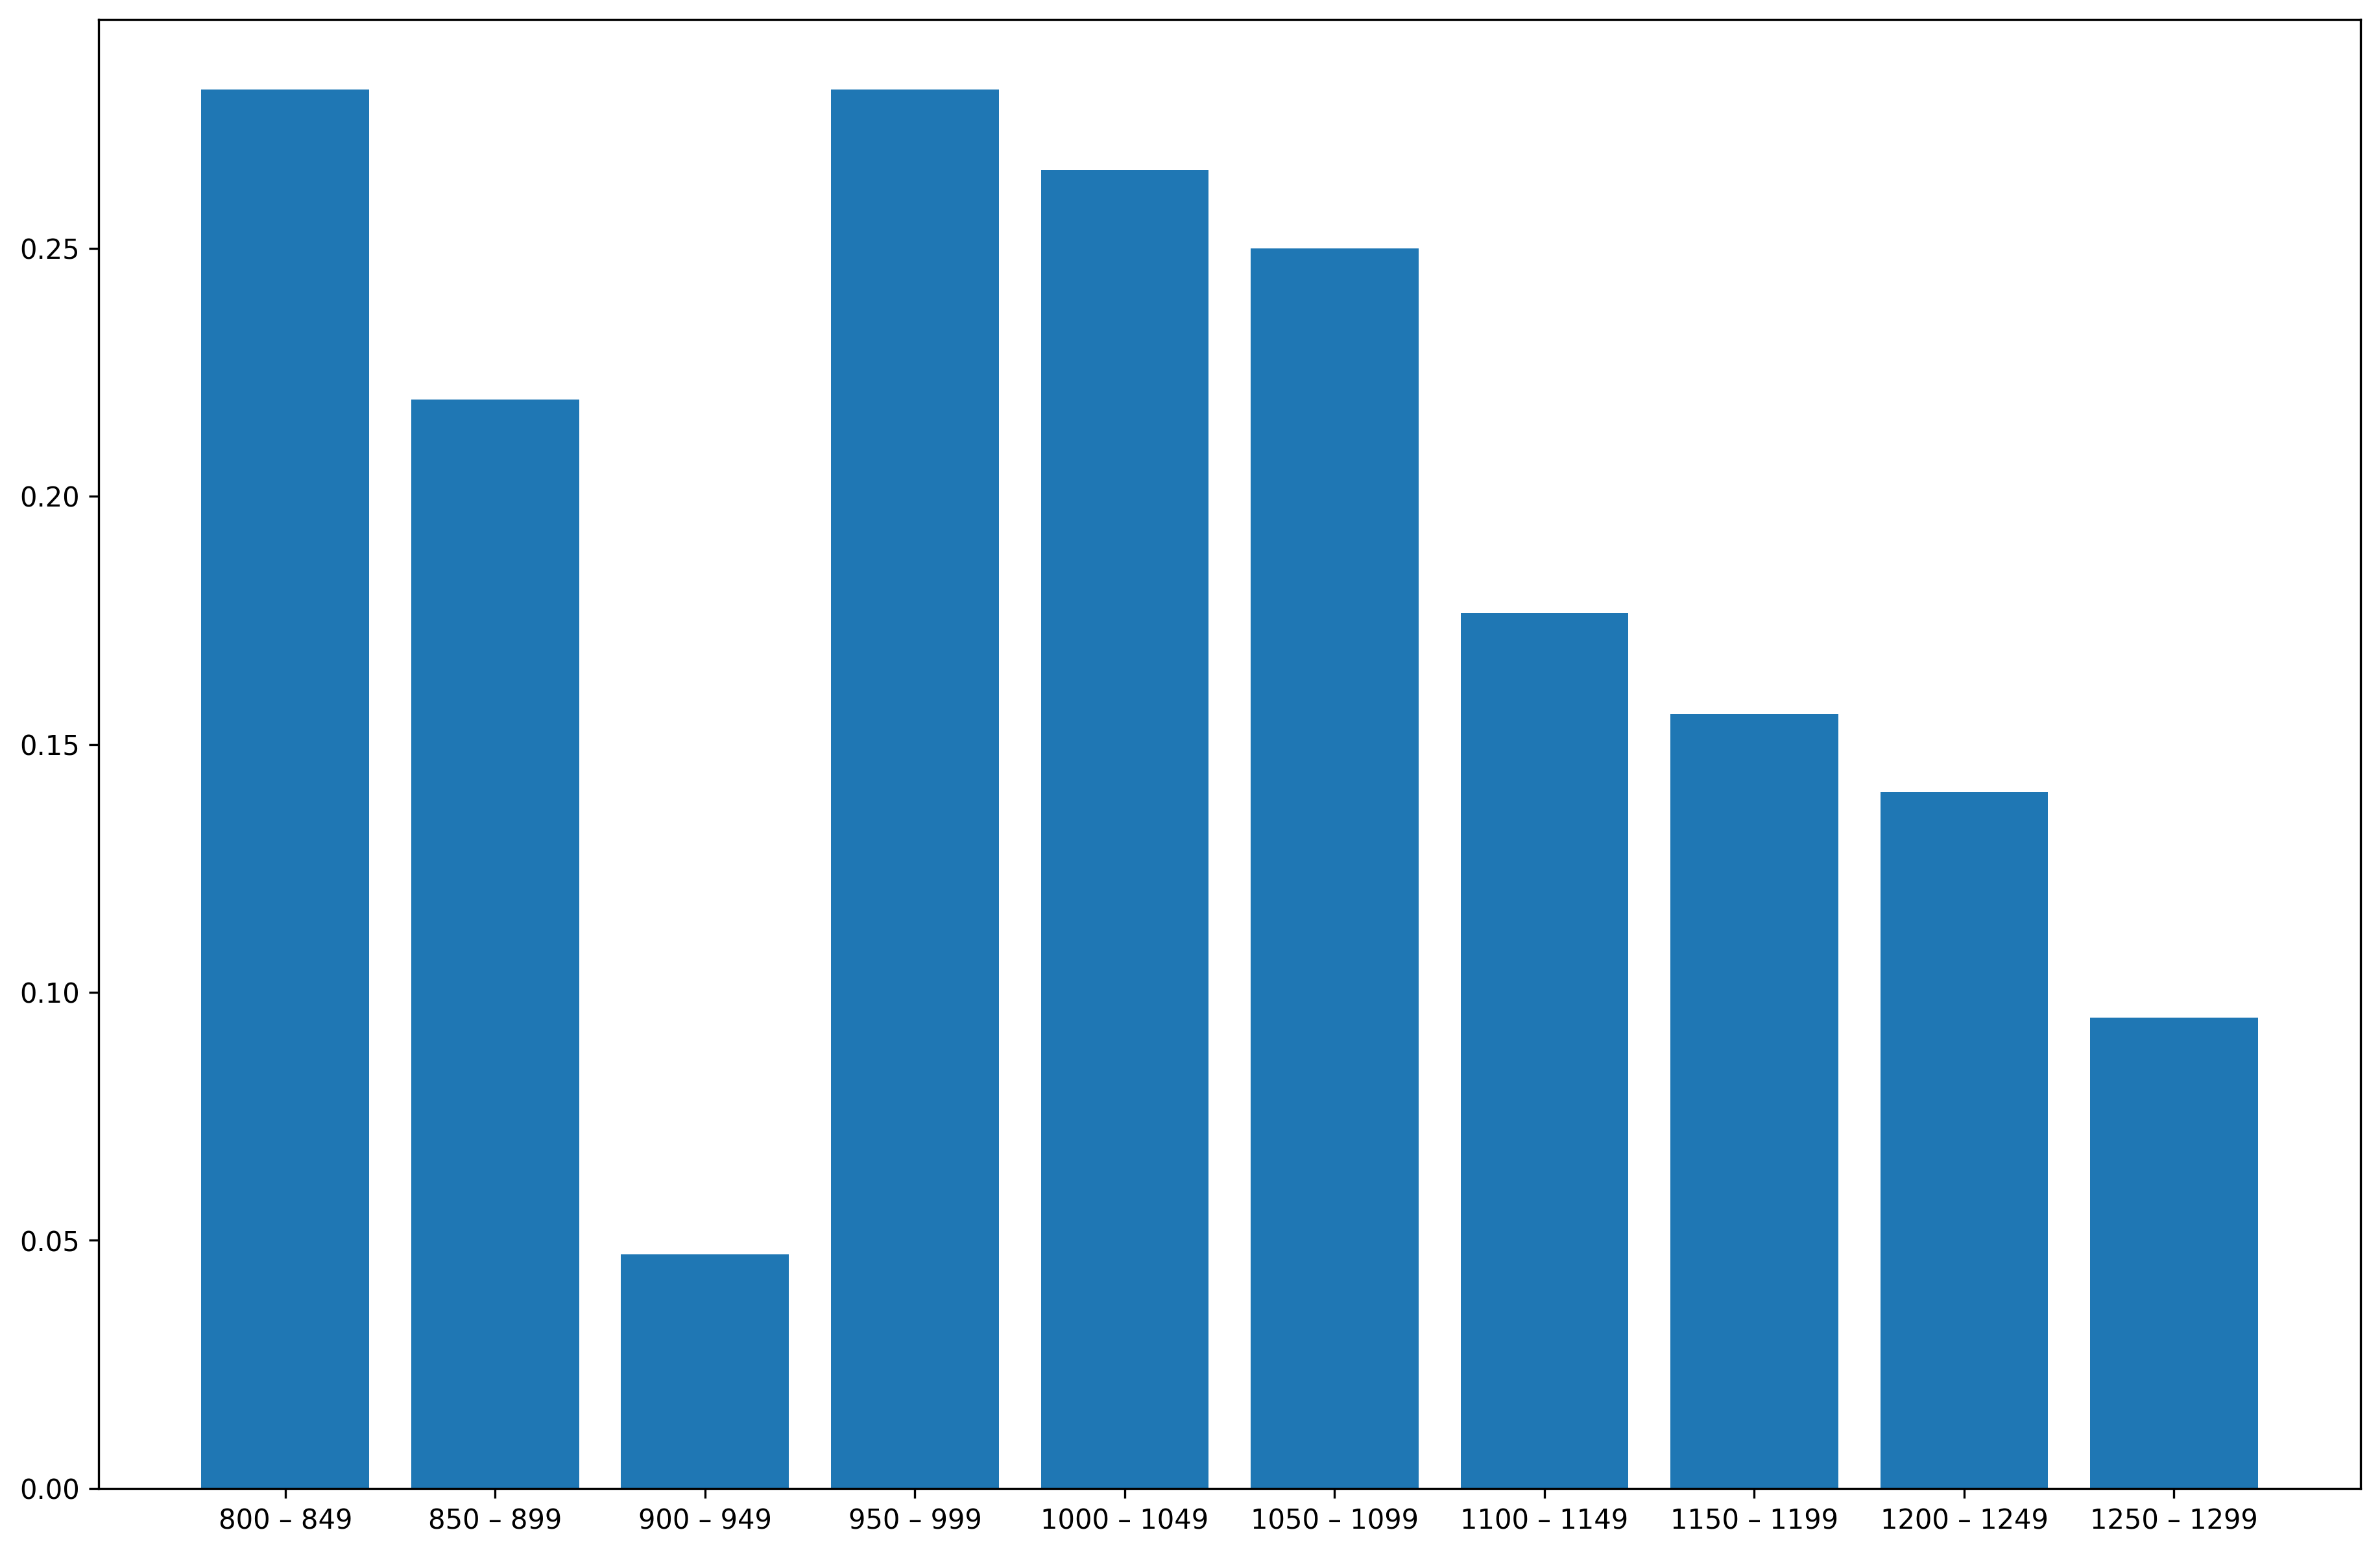

In [156]:
liste_indices = [neuvieme_siecle1,neuvieme_siecle2,dixieme_siecle1,dixieme_siecle2,onzieme_siecle1,onzieme_siecle2,douzieme_siecle1,
                douzieme_siecle2, treizieme_siecle1,treizieme_siecle2]
liste_dates_cooccurrences = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049",
                             "1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249","1250 – 1299"]

plt.figure(figsize=(15,10), dpi=300)
plt.bar(liste_dates_cooccurrences,liste_indices)
plt.savefig("Indices de jaccard_mancipium_seruus.png")

In [1]:
def csv_toeuclidean(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 4, nrows = 100)
    df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df[['lemme']]
    liste1 = list(df["lemme"])
    
    df2 = pd.read_csv(path2, sep=",", header = 4, nrows = 100)
    df2.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df2[['lemme']]
    liste2 = list(df2["lemme"])
    
    euclidean = distance.euclidean(liste1,liste2)
    
    return euclidean

In [162]:
from scipy.spatial import distance

In [4]:
neuvieme_siecle1 = csv_toeuclidean('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/800-849.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_cooccurrents/800-849.csv'